In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [7]:
# Load a statsmodels sample data using macro data
df = sm.datasets.macrodata.load_pandas().data
print(sm.datasets.macrodata.NOTE)
df.head()

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


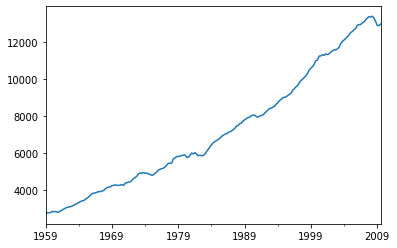

In [13]:
# tsa is time series analysis
# index needs to have a date, so how to create using statsmodels functions (similar to matplotlib and datetime)
# use head and tail to see what the range should be
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3') )
df.index = index
df.head()
df['realgdp'].plot()

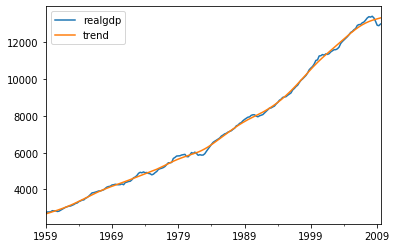

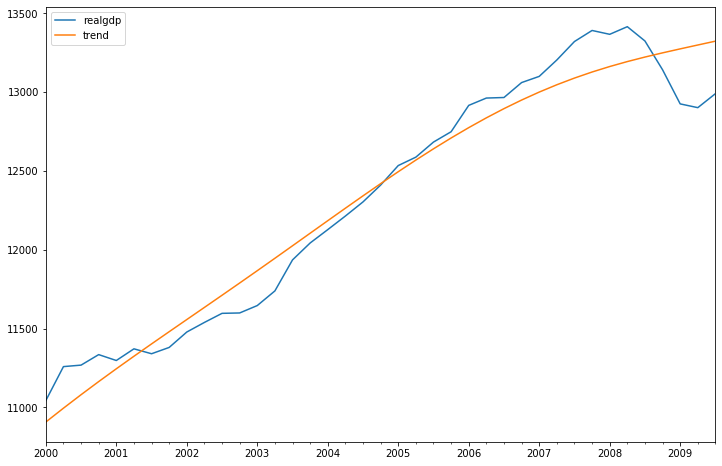

In [17]:
result = sm.tsa.filters.hpfilter(df['realgdp'])
type(result) # returns a tuple of (cycle and trend), trend line tends upwards
# tuple unpacking to grab the individual series
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])
# grab trend value and plot with realgdp data
df['trend'] = gdp_trend
df[['realgdp','trend']].plot()
# plot that is zoomed into a time you're interested in 
df[['realgdp','trend']]['2000-03-31':].plot(figsize=(12,8))

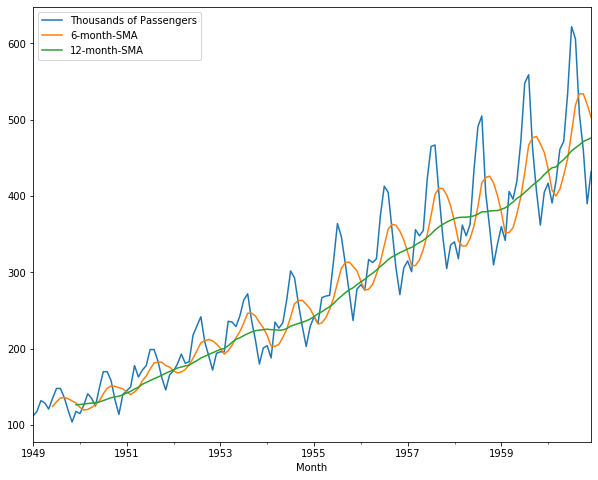

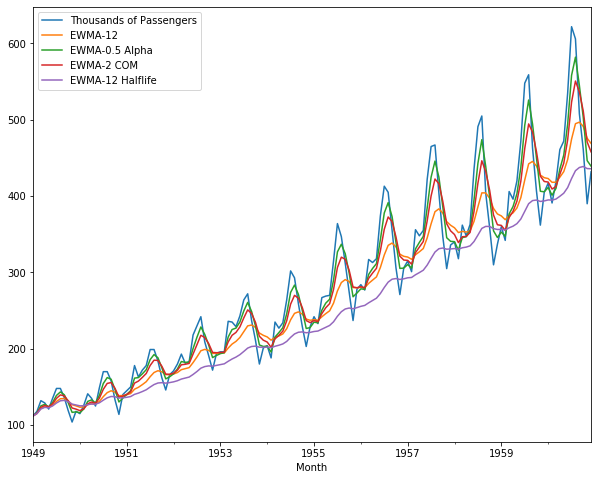

In [118]:
# ETS Decomposition
# Break down a Time Series into ETS = Error, Trend, Seasonality attributes
# Used for Exponential Smoothing, Trend Method Models, ETS Decomposition
# Then Observed = Trend + Seasonal + Residual terms

# EWMA Model
# Exponentially Weighted Moving Average models
# better than simple moving average weaknesses (averaging effects and extreme value effects, doesn't inform future behavior)
# reduce lag effect by putting more weights on recent values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
airline = pd.read_csv('airline_passengers.csv',index_col='Month')
# now look at index
airline.index
# seems gappy/data clean up issues - get rid of missing values
airline.dropna(inplace=True)
# now modify index to a datetime object
airline.index=pd.to_datetime(airline.index)
# calculate simple 6 month MA
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot(figsize=(10,8))
# now calculate EWMA, can use tab for column names and shift tab for ewm features
# different ways to calculate alpha: span, center of mass, half life, or if you want, alpha explicitly set
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
# other calibrations:
# s is span: n-day exponentially weighted moving average period (ex. 7 day or 14 day)
# c is center of mass: c = (span-1)/2  (ex. inverse with span)
# half life = period of time for exponential weight to reduce to one half
# alpha = smoothing factor
airline['EWMA-0.5 Alpha'] = airline['Thousands of Passengers'].ewm(alpha=0.5,adjust=True).mean()
airline['EWMA-2 COM'] = airline['Thousands of Passengers'].ewm(com=2,adjust=True).mean()
airline['EWMA-12 Halflife'] = airline['Thousands of Passengers'].ewm(halflife=12,adjust=True).mean()
# plot it:
airline[['Thousands of Passengers','EWMA-12','EWMA-0.5 Alpha','EWMA-2 COM','EWMA-12 Halflife']].plot(figsize=(10,8))
# more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
# When adjust is True (default), weighted averages are calculated using weights (1-alpha)**(n-1), (1-alpha)**(n-2), …, 1-alpha, 1.
# When adjust is False, weighted averages are calculated recursively as: weighted_average[0] = arg[0]; weighted_average[i] = (1-alpha)*weighted_average[i-1] + alpha*arg[i].
# One must have 0 < α <= 1, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment

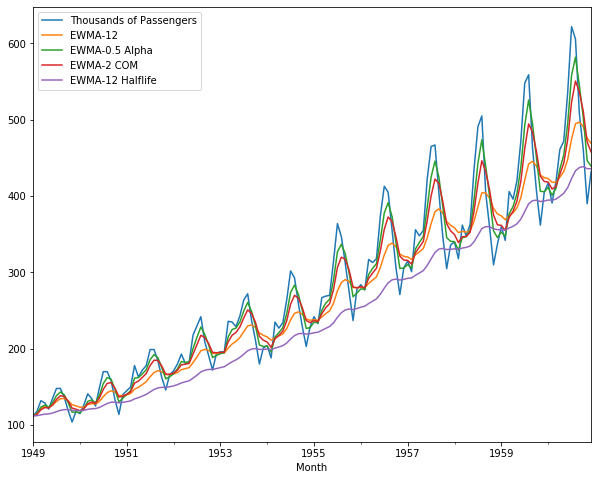

In [52]:
# what does adjust do?
# Adjust is True is default
# not sure, not much diff in this example
# when Adjust is True, x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline['EWMA-0.5 Alpha'] = airline['Thousands of Passengers'].ewm(alpha=0.5,adjust=False).mean()
airline['EWMA-2 COM'] = airline['Thousands of Passengers'].ewm(com=2,adjust=False).mean()
airline['EWMA-12 Halflife'] = airline['Thousands of Passengers'].ewm(halflife=12,adjust=False).mean()
airline[['Thousands of Passengers','EWMA-12','EWMA-0.5 Alpha','EWMA-2 COM','EWMA-12 Halflife']].plot(figsize=(10,8))

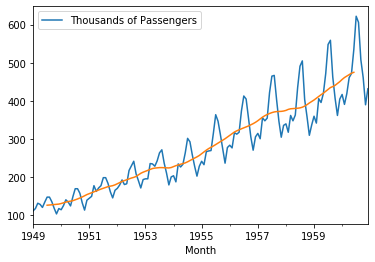

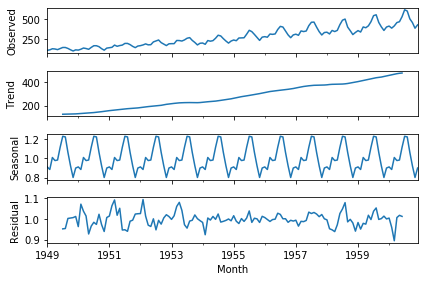

In [32]:
# ETS Decomposition Code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
airline = pd.read_csv('airline_passengers.csv',index_col='Month')
# now look at index, seems gappy - get rid of missing values
airline.index
airline.dropna(inplace=True)
# now modify index to a datetime object
airline.index=pd.to_datetime(airline.index)
airline.plot()
from statsmodels.tsa.seasonal import seasonal_decompose
# run the model: is it exponential growth or linear? if exponential use multiplicative, use 'additive' model for linear
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative') 
result.trend.plot()
fig = result.plot() # may show twice in jupyter notebook 

In [53]:
# ARIMA Model
# Auto Regressive Integrated Moving Average
# has 2 types of ARIMA models: Non-Seasonal and Seasonal

# arima(p,d,q) 
# p=auto-regression to model dependent relationship
# d=integration is differencing to make series stationary
# q=moving average to model dependency on moving average error

# stationary - can we visually see it?
# stationary = good, nonstationary = bad
# stationary series has constant mean and variance over time (good = mean and variance will be same in future periods)
# 1) mean has to be constant to be stationary (no upward trend)
# 2) variance should not be changing as a function of time (bad = variance big and small over diff time periods)
# 3) covariance (change in variance) should not be a function of time (good = nice accordion, bad = partly squished accordian)
# don't need to visualize all the time, just use mathematically (Augmented Dickey Fuller Test)

# conversion from non-stationarity to stationarity can be done through differencing 
# differencing = (first difference = t minus t-1, second difference = first diff t minus first diff t-1)
# also could try: differencing then seasonal differencing
# each differencing step loses a row of data

# Choosing Values for p,d,q (ARIMA model) and additional P, D, Q (seasonal ARIMA model)

# Autocorrelation Plots (ACF) - MA model identification
# 
# Shows the correlation of a time series with "itself lagged by x time units"
# y axis is correlation coefficient, x axis is # of units of time lag (ex. 1D, 2D, ... 10D)
#
# ACF two common plots:
#
# 1) Gradual decline 
# 2) Large drop off
# if ACF shows positive autocorrelation in first lag (lag at time 1) then suggest to use the AR term in relation to the lag
# if ACF shows negative autocorrelation in first lag (lag at time 1) then suggest to use the MA term 

# Partial Correlation (PACF) - AR model identification
#
# Calculate partial correlation between the variables (y and x3) 
# Partial correlation is the correlation between how y and x3 each are related to x1 and x2
# Partial autocorrelation plot would show some sharp drop off after lag "k", suggesting AR-k should be used
# If gradual decline in PACF, then choose MA

# So AR or MA?
#
# Identify an AR model usually using PACF (Partial Autocorrelation Function) 
# Identify an MA model usually best done with ACF (Autocorrelation Function) rather than PACF
# Typically would choose MA or AR, rarely both (choose p or choose q)
# p is # of lag observations included in the model
# d is # of times raw observations are differenced
# q is size of moving average window (also called "order of MA")





In [54]:
# ARIMA Code Along
# 1) Visualize the Time Series
# 2) Make the time series stationary
# 3) Plot Correlation and Autocorrelation Charts
# 4) Construct ARIMA model
# 5) Use model to make predictions (forecasting)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline



In [62]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.head()
# rename that long column
df.columns = ['Month','Milk in Pounds per Cow']
# check tail
df.tail()
df.drop(168,axis=0,inplace=True)
df.tail()
# get rid of normal index, change month to datetime and index, 
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()
# see the statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


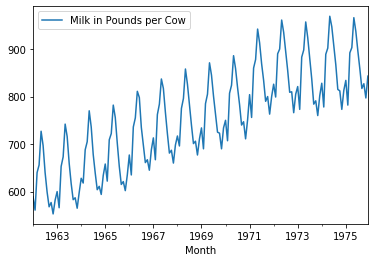

In [63]:
# visualize the data
# has a trend aspect and has a seasonality aspect 
df.plot()

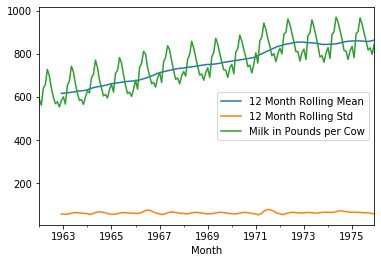

In [67]:
time_series = df['Milk in Pounds per Cow']
type(time_series) # pandas.core.series.Series
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

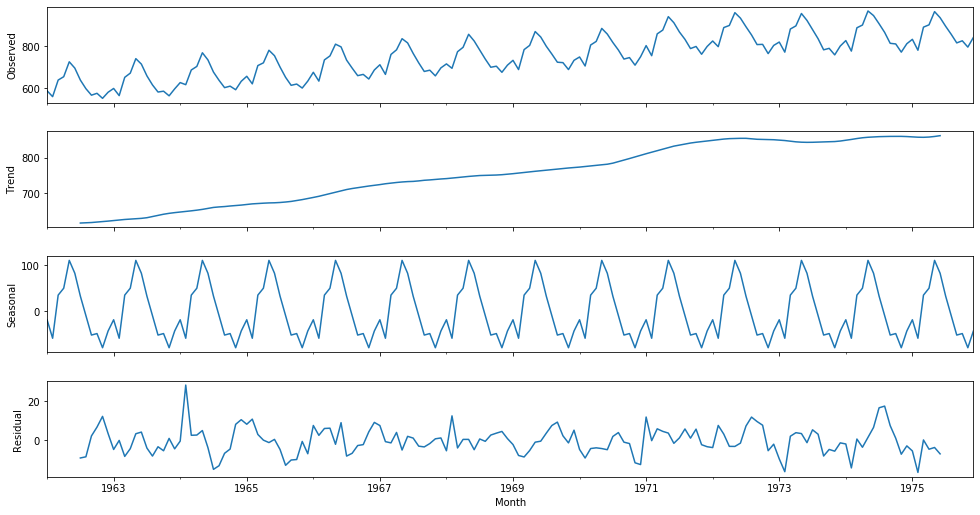

In [72]:
# ETSD Decomposition Plot
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(time_series,freq=12,model='additive') # the trend does not appear multiplicative
fig = decomp.plot()
fig.set_size_inches(15,8)

In [132]:
# Test for stationarity using Augmented Dickey Fuller Test
df.head() # shows us datetime index of month and some milk
# null hypothesis = is not stationary
# alternative = is stationary
# p value less than 0.05 to reject the null hypothesis
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Milk in Pounds per Cow']) 
# returns a tuple
# returns an ugly format with p value, number of lags used, critical values
result

(-1.3038115874221317,
 0.6274267086030305,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [136]:
result = adfuller(df['Milk in Pounds per Cow']) 
labels = ['ADF Test Statistics','p-value','# of lags used', '# of Observations Used']
index = 0
for value,label in zip(result,labels):        
        print('index ' + str(index) + ': ' + label + ' : ' +str(value))
        index = index + 1

index 0: ADF Test Statistics : -1.3038115874221317
index 1: p-value : 0.6274267086030305
index 2: # of lags used : 13
index 3: # of Observations Used : 154


In [76]:
def adf_check(time_series):
    result = adfuller(time_series) 
    print('Augmented Dicky Fuller Test')
    print('***************************')
    labels = ['ADF Test Statistics','p-value','# of lags used', '# of Observations Used']
    for value,label in zip(result,labels):
        print(label + ' : ' +str(value))
    
    # result[1] is the p-value
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
        print('Good')
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root and is nonstationary')
        print('Bad')


In [77]:
# run adf check on the original data
adf_check(df['Milk in Pounds per Cow']) # seasonality has clearly shown that it is not stationary

Augmented Dicky Fuller Test
***************************
ADF Test Statistics : -1.3038115874221317
p-value : 0.6274267086030305
# of lags used : 13
# of Observations Used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is nonstationary
Bad


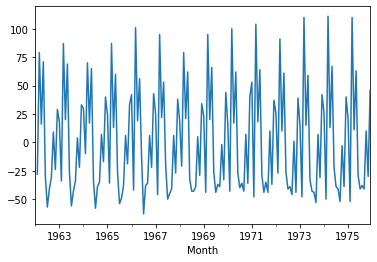

Augmented Dicky Fuller Test
***************************
ADF Test Statistics : -3.0549955586530895
p-value : 0.030068004001784086
# of lags used : 14
# of Observations Used : 152
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary
Good


In [80]:
# Since non stationary, take a first difference and see
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)
df['First Difference'].plot()
plt.show()
adf_check(df['First Difference'].dropna())

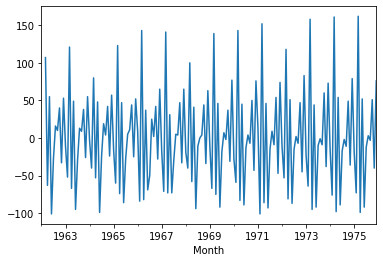

Augmented Dicky Fuller Test
***************************
ADF Test Statistics : -14.327873645603342
p-value : 1.1126989332082822e-26
# of lags used : 11
# of Observations Used : 154
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary
Good


In [81]:
# Try second difference and see
df['Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)
df['Second Difference'].plot()
plt.show()
adf_check(df['Second Difference'].dropna())

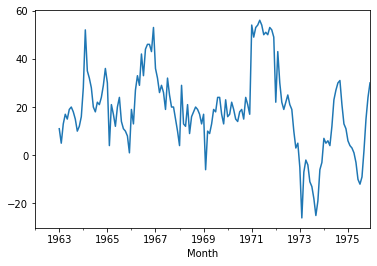

Augmented Dicky Fuller Test
***************************
ADF Test Statistics : -2.335419314359397
p-value : 0.16079880527711382
# of lags used : 12
# of Observations Used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is nonstationary
Bad


In [85]:
# can also take a seasonal difference
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12) # seasonal diff is 12
df['Seasonal Difference'].plot()
plt.show()
adf_check(df['Seasonal Difference'].dropna())

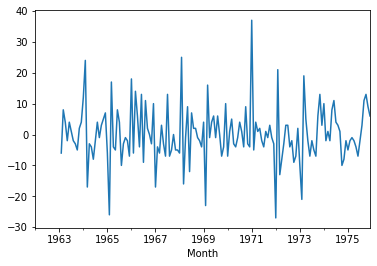

Augmented Dicky Fuller Test
***************************
ADF Test Statistics : -5.03800227492198
p-value : 1.865423431878859e-05
# of lags used : 11
# of Observations Used : 143
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary
Good


In [87]:
# can also take a seasonal first difference
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12) # seasonal first diff is 12
df['Seasonal First Difference'].plot()
plt.show()
adf_check(df['Seasonal First Difference'].dropna())

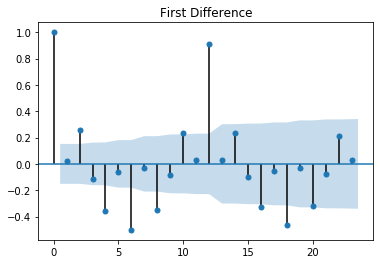

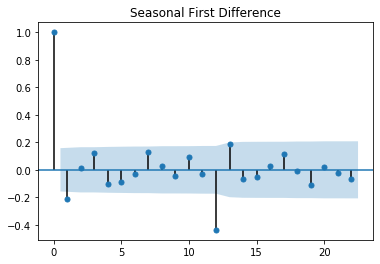

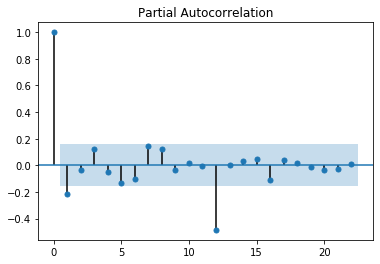

In [96]:
# ACF and PACF Plots (Autocorrelation)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_first = plot_acf(df['First Difference'].dropna(),title='First Difference')
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna(), title='Seasonal First Difference')
# PACF Plot
# https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm
result = plot_pacf(df['Seasonal First Difference'].dropna()) # common to see sudden drop off then use AR, if gradual then use MA

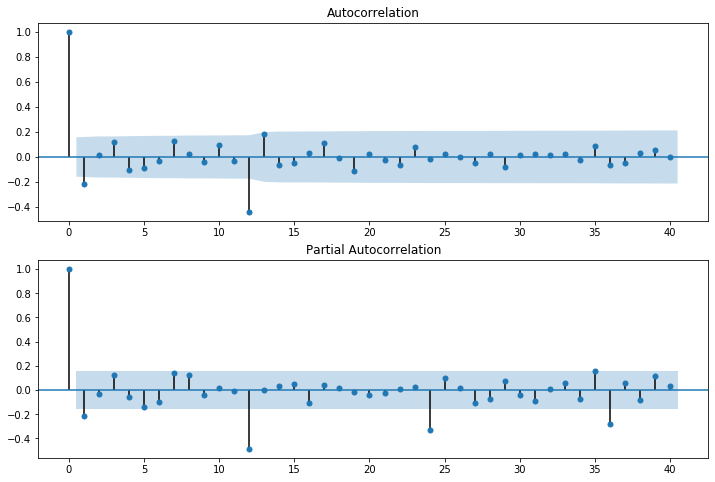

In [100]:
# Final plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)

In [119]:
# ARIMA Model
# Now that we have a stationary model
from statsmodels.tsa.arima_model import ARIMA

# SARIMAX = S is for seasonal, X is for exogeneous for external variables
# for full documentation string --> help(ARIMA) 
# Some additional docs https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html
# Here we have seasonal so use seasonal ARIMA model
# p=auto-regression to model dependent relationship
# d=integration is differencing to make series stationary
# q=moving average to model dependency on moving average error
# p is # of autoregressive lag observations included in the model
# d is # of times raw observations are differenced
# q is size of moving average window (also called "order of MA")
# seasonal_order is (Seasonal AR spec, Seasonal Integration Order, Seasonal MA, Seasonal Periodicity)
# (p = 0, d = 1, q = 0)  and (P = 1, D = 1, Q = 1) Periodicity = 12
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'], order=(0,1,0), seasonal_order=(1,1,1,12)) 

# This warning basically says it assumes your time series periods are assumed and have no gaps in data:
# ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

# This function may take a while
results = model.fit()
print(results.summary())



C:\Users\V\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Wed, 01 Apr 2020   AIC                           1074.131
Time:                                    22:51:11   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

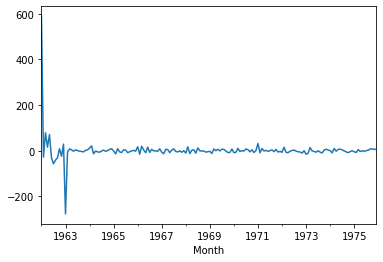

In [120]:
# to see the residual value
results.resid
results.resid.plot()

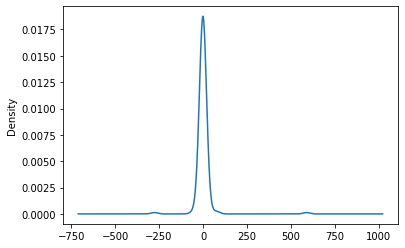

In [121]:
# to see distribution of our errors
results.resid.plot(kind='kde')
# note we see it is around zero, which is good

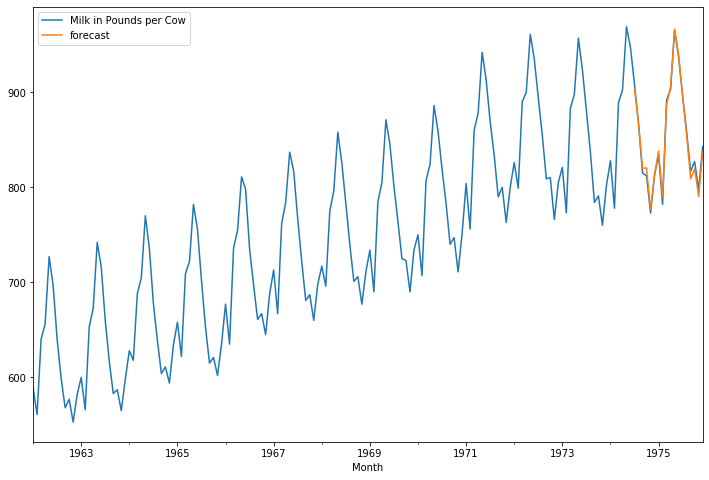

In [122]:
# forecast on yourself on data that you already know
df['forecast'] = results.predict(start=150, end=168)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

In [123]:
# Forecast beyond current time period
df.tail()
# Add on more months with empty values, date increment for date range
from pandas.tseries.offsets import DateOffset
# df.index[-1] is the last date then ADD an offset of 1 month, 2 month... not +0 month because duplicate = not 0,24 but 1,24
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_dates
# Create a new dataframe
future_df = pd.DataFrame(index=future_dates,columns=df.columns)
final_df = pd.concat([df,future_df])
final_df.head()
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
final_df['forecast'] = results.predict(start=168,end=192)
final_df.tail()

,Milk in Pounds per Cow,First Difference,Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525867
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918957
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881182
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027295
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962996


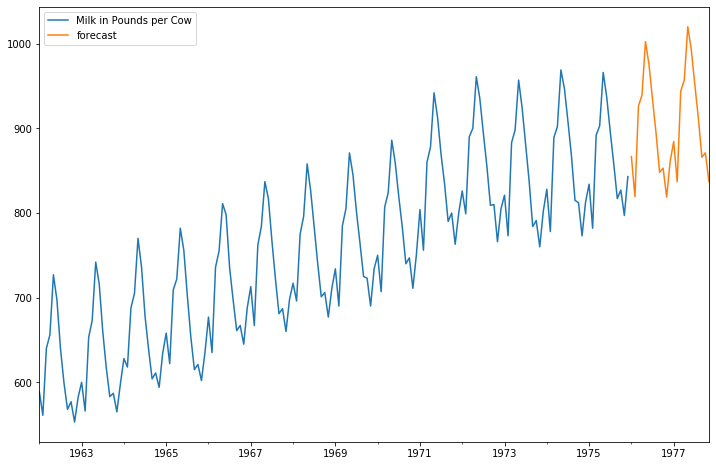

In [125]:
final_df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

# why ARIMA works well?
# time has a clear impact on y value
# ARIMA assumes time is an important component
# why ARIMA doesn't work well for stocks?
# Financial stock prices tend to be more random, so more Brownian Motion and Monte Carlo

# https://people.duke.edu/~rnau/arimrule.htm
# https://stats.stackexchange.com/questions/44992/what-are-the-values-p-d-q-in-arima